In [1]:
pwd

'C:\\Users\\praju\\Great Learning\\Supervised Learning\\Project'

In [5]:
import  numpy as np
import pandas as pd


In [6]:
data1=pd.read_csv('Data1.csv')
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [7]:
data2=pd.read_csv('data2.csv')
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [8]:
print(data1.shape)
print(data2.shape)

(5000, 8)
(5000, 7)


#  Merging Both the Data

In [9]:
data=data1.merge(data2)
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [11]:
data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [7]:
data.drop('ID',axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 546.9 KB


In [9]:
data.shape

(5000, 13)

In [10]:
data.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [11]:
col=['Mortgage','Security','FixedDepositAccount']
for i in col:
    data[i]=data[i].astype('category')
data.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore               int64
MonthlyAverageSpend     float64
Level                     int64
Mortgage               category
Security               category
FixedDepositAccount    category
InternetBanking           int64
CreditCard                int64
LoanOnCard              float64
dtype: object

In [12]:
col=['HighestSpend','MonthlyAverageSpend']
for i in col:
    data[i]=data[i].astype('int')
data.dtypes

Age                       int64
CustomerSince             int64
HighestSpend              int32
ZipCode                   int64
HiddenScore               int64
MonthlyAverageSpend       int32
Level                     int64
Mortgage               category
Security               category
FixedDepositAccount    category
InternetBanking           int64
CreditCard                int64
LoanOnCard              float64
dtype: object

In [13]:
data.isna().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.duplicated().sum()

0

In [16]:
data.HiddenScore.value_counts()/data.LoanOnCard.count()

1    0.294378
2    0.259639
4    0.243976
3    0.202008
Name: HiddenScore, dtype: float64

In [17]:
data.describe()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,93152.420482,2.395582,1.515261,1.880924,0.597189,0.294378,0.096386
std,11.464212,11.468716,46.07009,2123.660073,1.147200,1.744002,0.840144,0.490513,0.455808,0.295149
min,23.000000,-3.000000,8.00000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,91911.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,93407.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,94608.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.00000,96651.000000,4.000000,10.000000,3.000000,1.000000,1.000000,1.000000


# Univariate Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

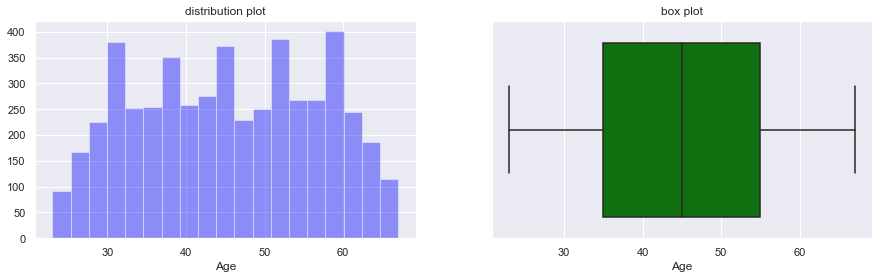

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(data['Age'], kde=False,color='blue')
plt.subplot(1,2,2)
plt.title('box plot')
sns.boxplot(data['Age'],orient='h' ,color='green')
plt.show()

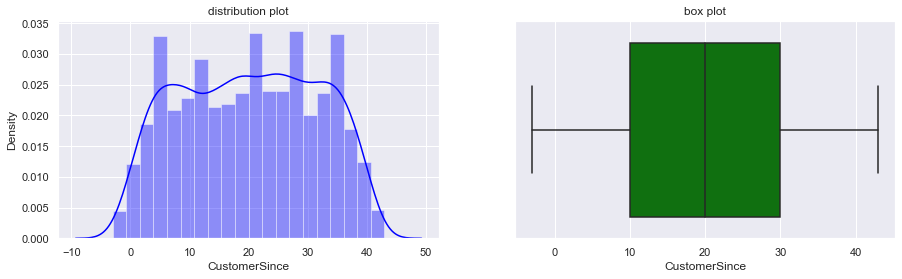

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
    plt.title('distribution plot')
sns.distplot(data['CustomerSince'],color='blue')
plt.subplot(1,2,2)
plt.title('box plot')
sns.boxplot(data['CustomerSince'] ,color='green')
plt.show()

<AxesSubplot:title={'center':'Boxplot'}, xlabel='HighestSpend'>

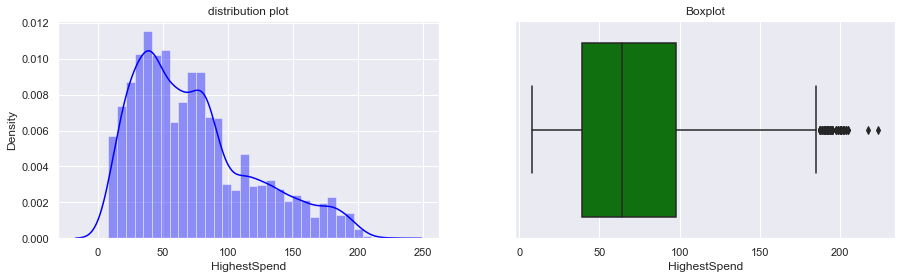

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(data['HighestSpend'],color='blue')
plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(data['HighestSpend'],color='Green')

<AxesSubplot:title={'center':'Boxplot'}, xlabel='MonthlyAverageSpend'>

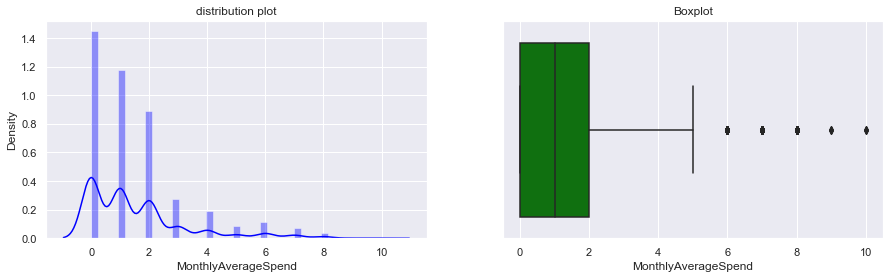

In [22]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('distribution plot')
sns.distplot(data['MonthlyAverageSpend'],color='blue')
plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(data['MonthlyAverageSpend'],color='Green')

# Ploting for categorial variable

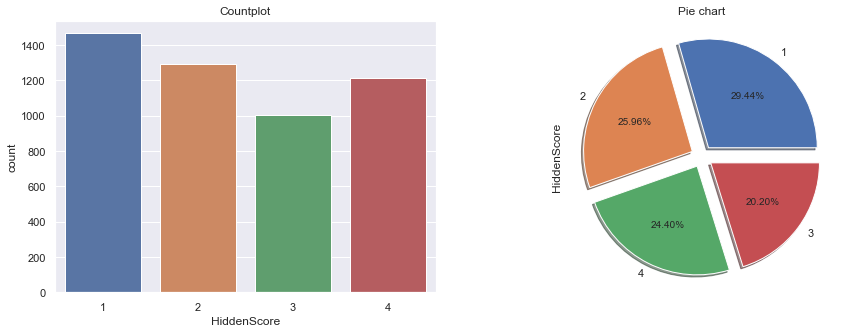

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['HiddenScore'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['HiddenScore'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1,0.1,0.1),autopct='%1.2f%%');


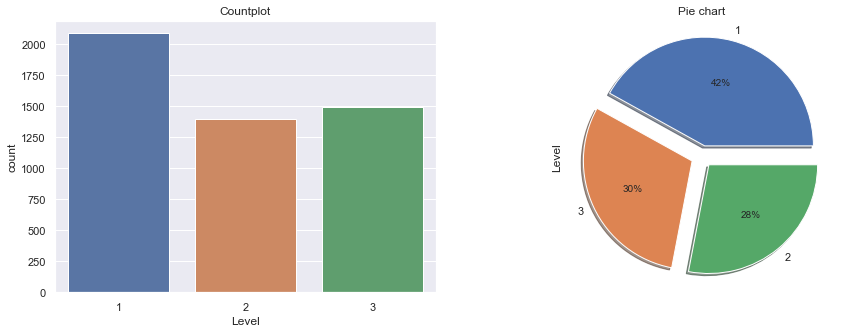

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['Level'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['Level'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1,0.1),autopct='%.0f%%');

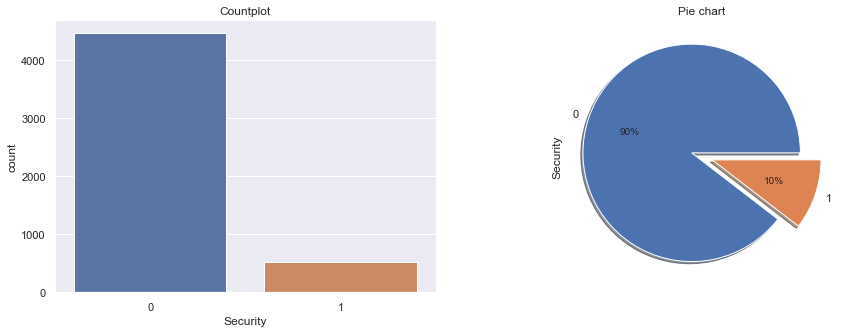

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['Security'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['Security'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1),autopct='%.0f%%');

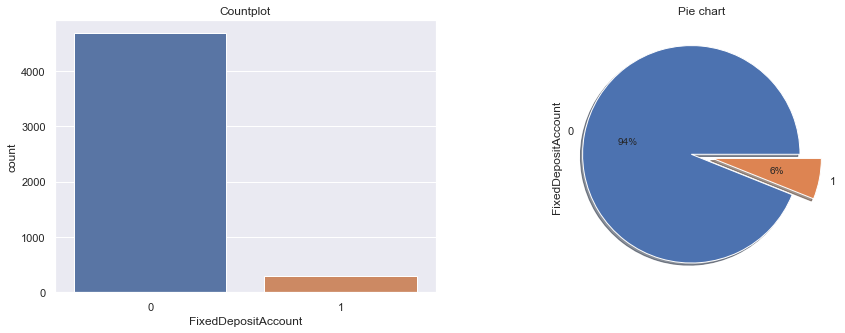

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['FixedDepositAccount'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['FixedDepositAccount'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1),autopct='%.0f%%');

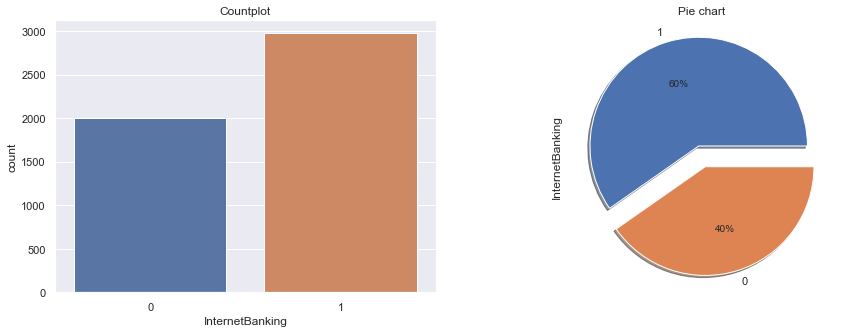

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['InternetBanking'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['InternetBanking'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1),autopct='%.0f%%');

<AxesSubplot:title={'center':'Pie chart'}, ylabel='LoanOnCard'>

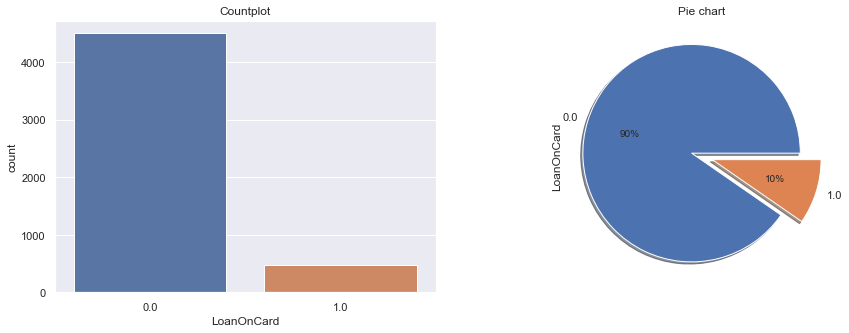

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Countplot')
sns.countplot(data['LoanOnCard'])
plt.subplot(1,2,2)
plt.title('Pie chart')
data['LoanOnCard'].value_counts().plot.pie(shadow=True,explode=(0.1,0.1),autopct='%.0f%%')

## Bivariate Analysis 

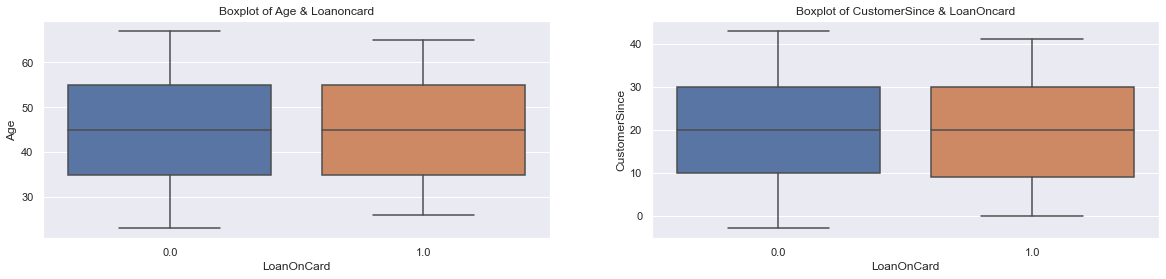

In [29]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Boxplot of Age & Loanoncard')
sns.boxplot(x='LoanOnCard', y='Age', data = data );
plt.subplot(1,2,2)
plt.title('Boxplot of CustomerSince & LoanOncard')
sns.boxplot(x='LoanOnCard',y='CustomerSince', data=data );


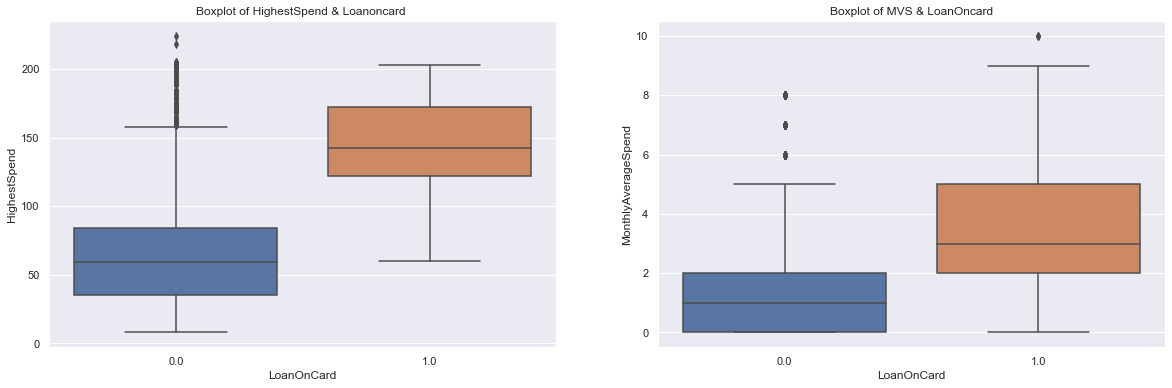

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Boxplot of HighestSpend & Loanoncard ')
sns.boxplot(x='LoanOnCard', y='HighestSpend', data = data );
plt.subplot(1,2,2)
plt.title('Boxplot of MVS & LoanOncard')
sns.boxplot(x='LoanOnCard',y='MonthlyAverageSpend', data=data );

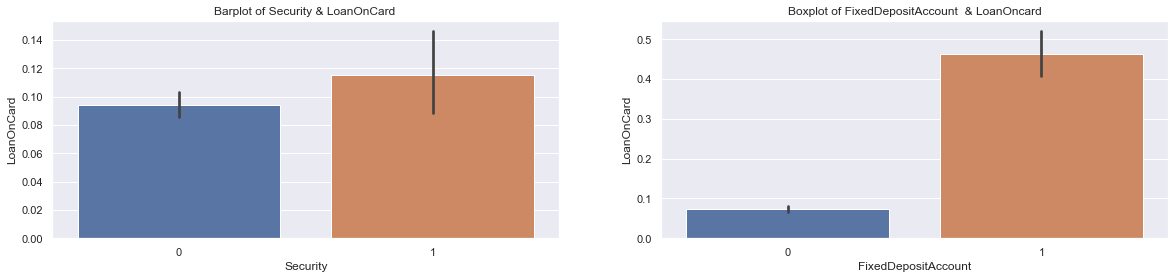

In [31]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Barplot of Security & LoanOnCard ')
sns.barplot(x='Security', y='LoanOnCard', data = data );
plt.subplot(1,2,2)
plt.title('Boxplot of FixedDepositAccount  & LoanOncard')
sns.barplot(data['FixedDepositAccount'],data['LoanOnCard'], data=data);

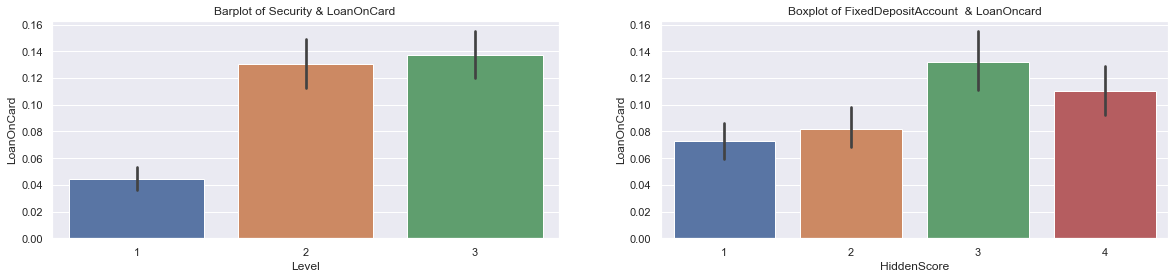

In [32]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Barplot of Security & LoanOnCard ')
sns.barplot(x='Level', y='LoanOnCard', data = data );
plt.subplot(1,2,2)
plt.title('Boxplot of FixedDepositAccount  & LoanOncard')
sns.barplot(data['HiddenScore'],data['LoanOnCard'], data=data);

##  Multivariate Analysis

<Figure size 1440x576 with 0 Axes>

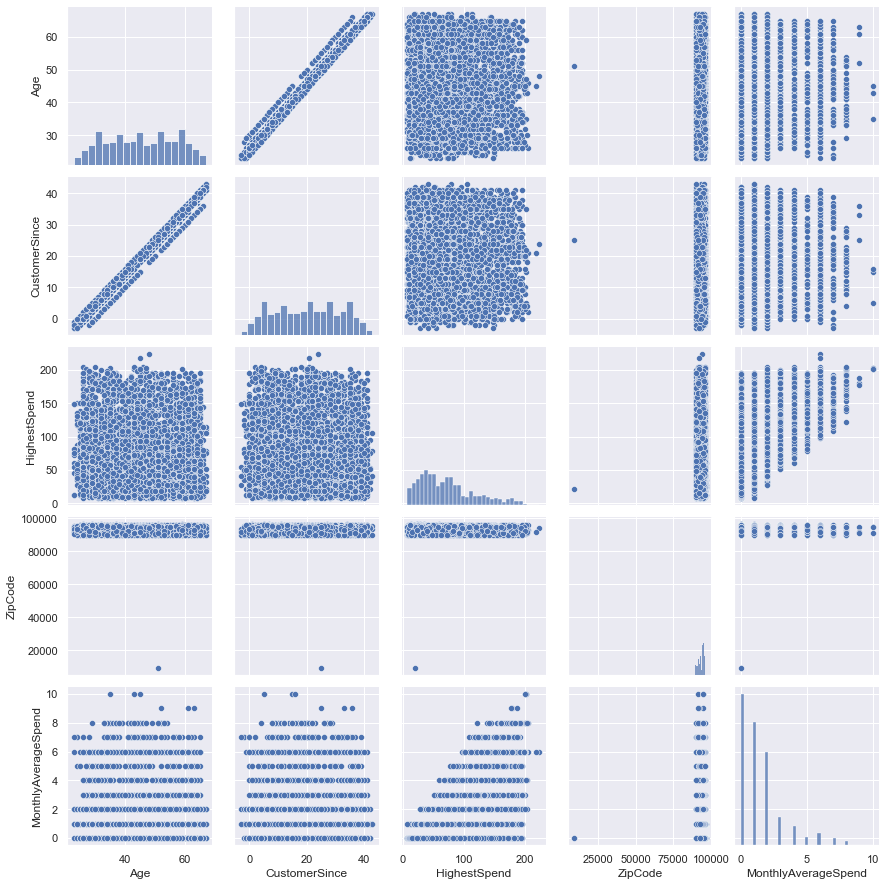

In [33]:
plt.figure(figsize=(20,8));
sns.pairplot(data[['Age', 'CustomerSince', 'HighestSpend', 'ZipCode' ,'MonthlyAverageSpend']])

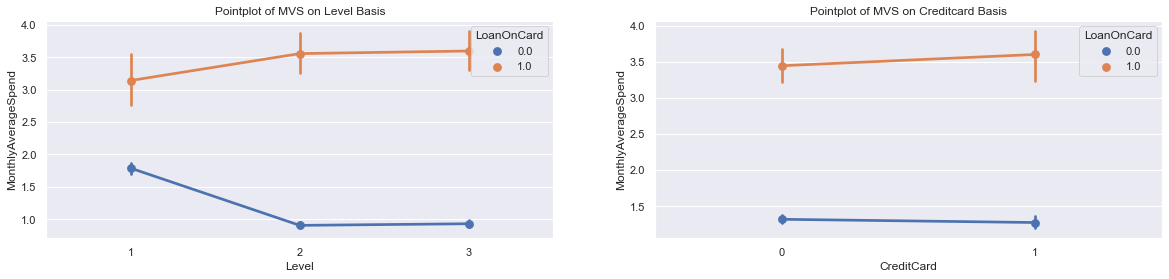

In [34]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Pointplot of MVS on Level Basis')
sns.pointplot(x='Level', y='MonthlyAverageSpend', hue='LoanOnCard', data = data );
plt.subplot(1,2,2)
plt.title('Pointplot of MVS on Creditcard Basis')
sns.pointplot(x='CreditCard' , y='MonthlyAverageSpend' , hue='LoanOnCard' , data=data);

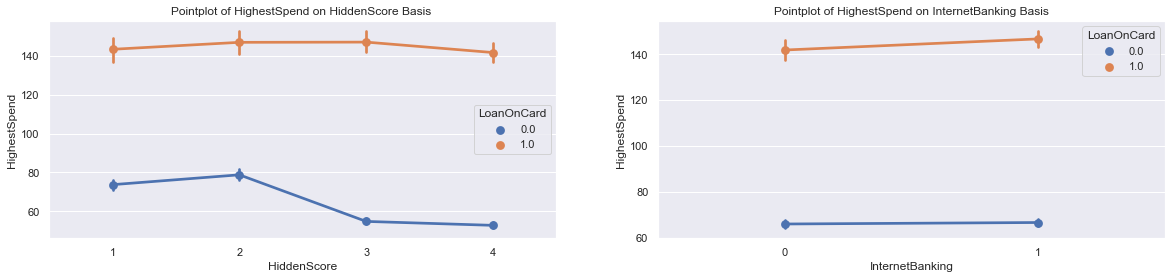

In [35]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title('Pointplot of HighestSpend on HiddenScore Basis ')
sns.pointplot(x='HiddenScore', y='HighestSpend', hue='LoanOnCard', data = data );
plt.subplot(1,2,2)
plt.title('Pointplot of HighestSpend on InternetBanking Basis')
sns.pointplot(x='InternetBanking' , y='HighestSpend' , hue='LoanOnCard' , data=data);

In [36]:
df=data.groupby('LoanOnCard')
df.mean().reset_index()

,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,InternetBanking,CreditCard
0,0.0,45.383111,20.146889,66.290444,93152.337111,2.372444,1.304444,1.843333,0.596222,0.294000
1,1.0,45.066667,19.843750,144.745833,93153.202083,2.612500,3.491667,2.233333,0.606250,0.297917


## Hypothesis Testing 

In [37]:
from scipy import stats 
from scipy.stats import ttest_ind

In [38]:
#AS these column not effecting muct so we will drops these columns.
df=data.drop(columns=['Age','ZipCode','CustomerSince']) 

In [39]:
col=['MonthlyAverageSpend','HighestSpend','HiddenScore','Level']

for i in col:
    x =df[df.LoanOnCard == 0][i]
    y =df[df.LoanOnCard == 1][i]
    t, p_value  = stats.ttest_ind(x,y,) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} has impact on loanOnCard'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} has no impact on LoanOncard'.format('\033[1m',i))
    print('\n')

 P_Value:1.5636130348417326e-161
 Rejecting Null Hypothesis.MonthlyAverageSpend has impact on loanOnCard


 P_Value:0.0
 Rejecting Null Hypothesis.HighestSpend has impact on loanOnCard


 P_Value:1.2918388215835613e-05
 Rejecting Null Hypothesis.HiddenScore has impact on loanOnCard


 P_Value:2.678370343935483e-22
 Rejecting Null Hypothesis.Level has impact on loanOnCard




In [40]:
col=['Mortgage','FixedDepositAccount','InternetBanking','CreditCard','Security']

for i in col:
    x =df[df.LoanOnCard == 0][i]
    y =df[df.LoanOnCard == 1][i]
    t, p_value  = stats.ttest_ind(x,y,) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} has impact on loanOnCard'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} has no impact on LoanOncard'.format('\033[1m',i))
    print('\n')

     

 P_Value:7.843482778860295e-24
 Rejecting Null Hypothesis.Mortgage has impact on loanOnCard


 P_Value:5.440798369426547e-116
 Rejecting Null Hypothesis.FixedDepositAccount has impact on loanOnCard


 P_Value:0.6703253415604109
 Fail to Reject Null Hypothesis.InternetBanking has no impact on LoanOncard


 P_Value:0.8579930559408179
 Fail to Reject Null Hypothesis.CreditCard has no impact on LoanOncard


 P_Value:0.12088847061187151
 Fail to Reject Null Hypothesis.Security has no impact on LoanOncard




# Data Pre-Processing

In [41]:
import numpy as np

col=['Age','CustomerSince','MonthlyAverageSpend','HighestSpend','HiddenScore','Level', 'Mortgage']
for i in col:
    q25,q75=np.percentile(data[i],25),np.percentile(data[i],75)
    IQR=q75-q25
    threshold=IQR*1.5
    upper=q75+threshold
    lower=q25-threshold
    Outliers=[i for i in data[i] if i < lower or i > upper]
    print('{} Total Number of Outliers {} : {}' . format('\033[1m',i,len(Outliers)))

 Total Number of Outliers Age : 0
 Total Number of Outliers CustomerSince : 0
 Total Number of Outliers MonthlyAverageSpend : 267
 Total Number of Outliers HighestSpend : 96
 Total Number of Outliers HiddenScore : 0
 Total Number of Outliers Level : 0
 Total Number of Outliers Mortgage : 291


# Target Imbalance 

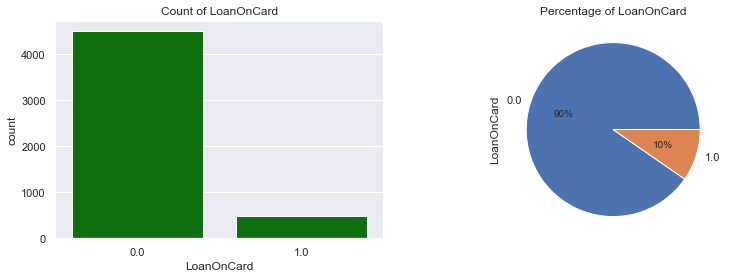

In [42]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.title('Count of LoanOnCard')
sns.countplot(data['LoanOnCard'],color='Green')

plt.subplot(1,3,2)
plt.title('Percentage of LoanOnCard')
data['LoanOnCard'].value_counts().plot.pie(autopct='%.0f%%')
plt.show()

# Train and Split 

In [43]:
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [44]:
x=df.drop(columns='LoanOnCard')
y=data['LoanOnCard']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#  Logistic Regression

In [46]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

# Accuracy Of the LR Model

In [47]:
pred=logit.predict(x_test)
print('Accuracy on Training data:',logit.score(x_train, y_train) )
print('Accuracy on Test data:',logit.score(x_test, y_test) )

Accuracy on Training data: 0.9515203671830178
Accuracy on Test data: 0.9484605087014726


# Confusion Matrix

<AxesSubplot:>

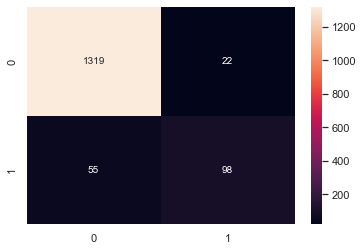

In [48]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

# Classification Report

In [49]:

print("classification  Matrix:\n",classification_report(y_test,pred));

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1341
         1.0       0.82      0.64      0.72       153

    accuracy                           0.95      1494
   macro avg       0.89      0.81      0.84      1494
weighted avg       0.95      0.95      0.95      1494



# Naive Bayes Classification

In [50]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

#  Accuracy Of the NBC Model

In [51]:
g_pred=model.predict(x_test)
print('Accuracy on Training data:',model.score(x_train, y_train))
print('Accuracy on Test data:',model.score(x_test, y_test) )

Accuracy on Training data: 0.8858290304073436
Accuracy on Test data: 0.8801874163319946


# Confusion Matrix

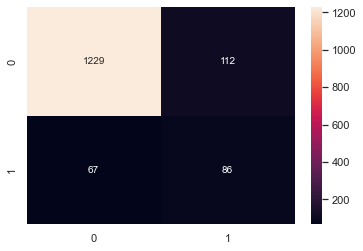

In [52]:
sns.heatmap(confusion_matrix(y_test,g_pred),annot=True,fmt='g');

# Classification Report

In [53]:
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1341
         1.0       0.43      0.56      0.49       153

    accuracy                           0.88      1494
   macro avg       0.69      0.74      0.71      1494
weighted avg       0.90      0.88      0.89      1494



# Conclusion and improvisation

#### As I would prefer to choose Logistic regression (balanced data) or GaussianNB as model.
#### Overlifting is less in Linear Model
#### Precision & recall values are better predicting the protential customers.
#### Suggesting to collect data equally for both the classes
#### Columns Like Zipcode and Customer since are not much effecting variable so these can be remove as it is increasing noise in the data 
#### Few customers does't have credit card but those customer having loan on card. This data error can be avoided   
   